In [3]:
pip install uniparser_morph

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install textgrid

Note: you may need to restart the kernel to use updated packages.


In [41]:
import json
import pandas as pd
import nltk
import textgrid
import matplotlib.pyplot as plt
import numpy as np

In [48]:
from uniparser_morph import Analyzer
from collections import Counter

In [3]:
a = Analyzer()
a.load_grammar()

# How `.json` files for tsakorpus were prepared

First, get metadata from MASC dataset:

In [4]:
df=pd.read_csv("aramaic_info_db.csv")
print(df)

    narrative_num              name  age gender         profession
0          III.01     Ḥabīb Fransīs   26      M     Trader, farmer
1          III.02      Čaḳla Fōḏ̣el   51      F  Housewife, farmer
2          III.03       Fōṭme Ḳamar   58      F  Housewife, farmer
3          III.04       Raḥme Šahīn   55      F          Housewife
4          III.05       Raḥme Šahīn   55      F          Housewife
..            ...               ...  ...    ...                ...
168         IV.70      Saʕda Ṭayfūr   61      F          Housewife
169         IV.71     Ḥabīb Fransīs   26      M     Trader, farmer
170         IV.72  Žaržūra Ruzḳalla   50      M            Teacher
171         IV.73  Žaržūra Ruzḳalla   50      M            Teacher
172         IV.74  Žaržūra Ruzḳalla   50      M            Teacher

[173 rows x 5 columns]


In [5]:
meta_speaker=[]
for index, row in df.iterrows():
    help_list=[]
    help_list.append(row['name'])
    help_list.append(row['age'])
    help_list.append(row['gender'])
    help_list.append(row['profession'])
    help_list.append(row["narrative_num"])
    meta_speaker.append(help_list)

In [6]:
df2=pd.read_csv("aramaic_corpus.db.csv")
print(df2.head())

  narrative_num                      narrative_subject
0        III.01  Activities at home and in the village
1        III.02  Activities at home and in the village
2        III.03  Activities at home and in the village
3        III.04  Activities at home and in the village
4        III.05  Activities at home and in the village


In [7]:
nar_num=df2["narrative_num"].tolist()
nar_num_extended=df2["narrative_num"].tolist()
nar_num_extended.extend(["V.01", "V.02", "V.03", "V.06", "V.07", "V.08", 
                "VII.01", "VII.02", "VII.03", "VII.04", "VII.05", "VII.06", "VII.07", "VII.08", "VII.09", "VII.10", "VII.11", "VII.12"])

In [8]:
i=0
for index, row in df2.iterrows():
    meta_speaker[i].append(row["narrative_subject"])
    i+=1

Here is how it looks like:

In [9]:
print(meta_speaker[:3])

[['Ḥabīb Fransīs', 26, 'M', 'Trader, farmer', 'III.01', 'Activities at home and in the village'], ['Čaḳla Fōḏ̣el', 51, 'F', 'Housewife, farmer', 'III.02', 'Activities at home and in the village'], ['Fōṭme Ḳamar', 58, 'F', 'Housewife, farmer', 'III.03', 'Activities at home and in the village']]


Secondly, get all sentences from `.txt` corpus file: 

In [10]:
korpus_sents=[]
f=open("Korpus.txt", "r", encoding="utf-8")
c=0
help_list=[]
for line in f:
    if c==4:
        korpus_sents.append(help_list[:-1])
        help_list=[]
        c=0
    help_list.append(line[:-1])
    c+=1
f.close()

Here is how it looks like:

In [11]:
print(korpus_sents[0])
print(korpus_sents[-1])

['3. Maalula: 001. M_ḤF Wie man Traubenhonig herstellt.txt', '001. ana ḥabīb fransīs m-maʕlūla, bann naḥək ex mišwill pšōṯa w ex mišwill tepsa.', '001. Ich bin Ḥabīb Fransīs aus Maʕlūla und will erzählen, wie man Rosinen macht und wie man (daraus) Traubenhonig macht.']
['7. Neue Lieder aus Maalula Žaržūra Ruzḳalla: 012. Auf dem Felsen am Kreuzfest', '012. Čimxammen mō čimxammen īla ʕlaynaḥ? // Īla wṣīṯa lə-bnōṯaḥ w lə-bnaynaḥ: // Yinšull tunya w-blōtun la yinšunna.', '012. (12 Strophe) Was denkst du, was es für uns hat? // Ein Vermächtnis für unsere Töchter und Söhne: // Sie sollen die Welt vergessen, aber nicht ihr Dorf.']


In [12]:
print(len(korpus_sents))

5802


Thirdly, get timecodes from MASC data for each sentence using `textgrid`:

In [13]:
aram_text_dict={}
germ_text_dict={}
names=[]
for sent in korpus_sents:
    if sent[0] not in names:
        names.append(sent[0])
print(names)

['3. Maalula: 001. M_ḤF Wie man Traubenhonig herstellt.txt', '3. Maalula: 002. M_ČF Wie man Aprikosenmarmelade einkocht.txt', '3. Maalula: 003. M_FḲ Wie der Käse gemacht wird.txt', '3. Maalula: 004. M_RŠ Wie das Getreide gemahlen wird.txt', '3. Maalula: 005. M_RŠ Brotbacken.txt', '3. Maalula: 006. M_ČF Wie man ein Gericht aus Weizen und Milch zubereitet.txt', '3. Maalula: 007. M_IH Wie ich einmal als Kind die Ziegen hütete.txt', '3. Maalula: 008. M_ŽYF Ein Schneesturm.txt', '3. Maalula: 009. M_ḤF Sturzbäche.txt', '3. Maalula: 010. M_ŽYF Das Singen im Weinberg.txt', '3. Maalula: 011. M_ČŠ Wir wir uns verlobten und heirateten.txt', '3. Maalula: 012. M_ČF Ein Kind kommt zur Welt.txt', '3. Maalula: 013. M_FḎ Bewirtung der Gäste bei der Geburt eines Kindes.txt', '3. Maalula: 014. M_ḎMP Die Wasserpfeife.txt', '3. Maalula: 015. M_ḤF Das Kaffeetrinken.txt', '3. Maalula: 016. M_ḤB Das Matetrinken.txt', '3. Maalula: 017. M_NḎ Ein muslimisches Mädchen erzählt von seinem Leben im Dorf.txt', '3. Ma

In [14]:
def textgrid_fn(filename):
    tg = textgrid.TextGrid.fromFile(filename)
    sents_info=[]
    for i in range(1, len(tg[0])-1):
        help_time=[]
        help_time.append(tg[0][i].minTime)
        help_time.append(tg[0][i].maxTime)
        sents_info.append(help_time)
    return sents_info

In [15]:
filenames=[]
for i in range(len(nar_num)):
    filenames.append("03b_MASC_textgrid_files/"+nar_num[i]+".TextGrid")

In [16]:
textgrids_first=[]
for i in range(len(filenames)):
    tgrid=textgrid_fn(filenames[i])
    textgrids_first.append(tgrid)

In [17]:
filenames_04=["textgrids/IV.04a.TextGrid", "textgrids/IV.04b.TextGrid", "textgrids/IV.04c.TextGrid", "textgrids/IV.04d.TextGrid"]

In [18]:
textgrids_04=[]
for i in range(len(filenames_04)):
    tgrid=textgrid_fn(filenames_04[i])
    textgrids_04.extend(tgrid)

In [19]:
tx_102=textgrids_first[102]
textgrids=[textgrids_04 if x==tx_102 else x for x in textgrids_first]
print(textgrids[102])

[[0.45, 9.52], [9.52, 20.48], [20.48, 37.34], [37.34, 46.43], [46.43, 60.51], [60.51, 69.51], [69.51, 73.95], [73.95, 83.14], [83.14, 95.22], [95.22, 107.73], [107.73, 114.16], [114.16, 124.14], [124.14, 138.22], [138.22, 144.96], [144.96, 148.4], [148.4, 171.59], [171.59, 182.87], [182.87, 187.4], [187.4, 193.94], [193.94, 198.55], [198.55, 207.7], [207.7, 217.21], [217.21, 228.59], [228.59, 233.77], [233.77, 239.5], [239.5, 250.2], [250.2, 254.94], [254.94, 257.18], [257.18, 263.37], [263.37, 268.19], [268.19, 272.79], [272.79, 279.45], [279.45, 297.97], [297.97, 303.55], [303.55, 317.21], [317.21, 325.92], [325.92, 338.16], [338.16, 346.42], [346.42, 352.26], [352.26, 354.81], [354.81, 373.61], [373.61, 380.41], [380.41, 387.23], [387.23, 398.64], [398.64, 406.1], [406.1, 417.83], [417.83, 425.16], [425.16, 431.18], [431.18, 438.09], [438.09, 443.29], [443.29, 449.87], [449.87, 458.81], [0.69, 7.89], [7.89, 13.18], [13.18, 26.55], [26.55, 32.83], [32.83, 41.24], [41.24, 51.36], [51.

Then, make dictionary out of Aramaic and German sents and metadata:

In [20]:
text_dict={}
aram_text=[]
germ_text=[]

for i in range(len(names)):
    for j in range(len(korpus_sents)):
        if korpus_sents[j][0]==names[i]:
            aram_text.append(korpus_sents[j][1])
            germ_text.append(korpus_sents[j][2])
    if i<173:
        speaker=meta_speaker[i][0]
        age=meta_speaker[i][1]
        gender=meta_speaker[i][2]
        profession=meta_speaker[i][3]
        narrative_num=meta_speaker[i][4]
        narrative_subject=meta_speaker[i][5]
        help_dict={"aram": {"aram_text": aram_text, "times": textgrids[i]}, 
                "germ": germ_text, 
                "speaker": speaker, "age": age, "gender": gender, "profession": profession,
                "narrative_num": narrative_num, "narrative_subject": narrative_subject}
    elif i==173:
        help_dict={"aram": {"aram_text": aram_text}, 
                "germ": germ_text,
                "speaker": "Ḥabīb Fransīs", "age": 26, "gender": "M", "profession": "Trader, farmer",
                "narrative_num": nar_num_extended[i], "narrative_subject": "UNK"}
    elif i==174:
        help_dict={"aram": {"aram_text": aram_text}, 
                "germ": germ_text,
                "speaker": "Meḥsen Ḳamar", "age": 45, "gender": "M", "profession": "Farmer",
                "narrative_num": nar_num_extended[i], "narrative_subject": "UNK"}
    elif i==175:
        help_dict={"aram": {"aram_text": aram_text}, 
                "germ": germ_text,
                "speaker": "Yḥanne (Ḥannūne) Barkīla", "age": 71, "gender": "F", "profession": "Farmer",
                "narrative_num": nar_num_extended[i], "narrative_subject": "UNK"}
    elif i==176:
        help_dict={"aram": {"aram_text": aram_text}, 
                "germ": germ_text,
                "speaker": "ŽF", "age": 0, "gender": "UNK", "profession": "UNK",
                "narrative_num": nar_num_extended[i], "narrative_subject": "UNK"}
    elif i==177:
        help_dict={"aram": {"aram_text": aram_text}, 
                "germ": germ_text,
                "speaker": "MF", "age": 0, "gender": "UNK", "profession": "UNK",
                "narrative_num": nar_num_extended[i], "narrative_subject": "UNK"}
    elif i==178:
        help_dict={"aram": {"aram_text": aram_text}, 
                "germ": germ_text,
                "speaker": "MP", "age": 0, "gender": "UNK", "profession": "UNK",
                "narrative_num": nar_num_extended[i], "narrative_subject": "UNK"}
    else:
        help_dict={"aram": {"aram_text": aram_text}, 
                "germ": germ_text,
                "speaker": "Žaržūra Ruzḳalla", "age": 53, "gender": "M", "profession": "Teacher",
                "narrative_num": nar_num_extended[i], "narrative_subject": "UNK"}     
    text_dict[names[i]]=help_dict
    aram_text=[]
    germ_text=[]

Here is how it looks like:

In [21]:
print(text_dict["4. Maalula: 074. M_ŽR Der Weinstock.txt"])

{'aram': {'aram_text': ['001. ġappaynaḥ žubaylīṯa, // menna čūṯ b-naḥḥīṯa, // ḳaṭṭūfa felkil ṭarča, // w ʕinbōya wḳīṯa wḳīṯa.', '002. arʕa ṭōba w čannīḥa, // w hī mṯīḥa l-felkiš šenna. // maḥkemla ḳalles rīḥa, // mappēla w šōḳel menna.', '003. ʕayna ʕa ġanna faṯṯīḥa, // faṯṯīḥa ʕayna ʕa ġanna, // b-arʕa ču čmiščaḥ sīḥa, // w lā salla w la ʕurnīṯa.', '004. taxlax yā mōrlə mrūṯa, // zēx ʕa liššōni malle, // in batte ḥamra l-maščūṯa, // lə-ḥḏūṯa: «ṯāx əšḳolle!»', '005. w ti batte zaxma w ḳūṯa, // yīxul w yʕappis selle, // m-ġofna b-ʕezziš šappūṯa, // lā nzīʕa w la mallīṯa.', '006. xarma batte manṭarča, // mn-awwal yōma ynuṭrunne, // lā čiʕbarle mẓanṭarča, // w lā_rəʕwōṯa yirʕunne,', '007. w lā ṭiflōyəl ḳanṭarča, // ḥummaʕyōṯa yuxlunne. // ṯōḳen ḳaṭṭūfəl ṭarča // ṣumte p-satril ʕillīṯa.', '008. ʕemmil nohra sallīḳa, // w šḳīla b-īḏa makla; // ayṯaṯ ṭaʕnič čuwrīḳa, // ḥṣōḏa ex zarʕa m-ḥaḳla.', '009. lā ōṯ ommṯa šallīḳa, // w lā naṭōra yiffoḳla, // m-xarma l-xarma marrīḳa, // ču ġappa mett ə

## Final preparations

In [22]:
def text_to_tok(text_to_tokens, lang):
    first_tokens = nltk.word_tokenize(text_to_tokens)
    final_tokens=[]
    
    for tok in first_tokens:
        if lang=="aram":
            tok=tok.lower()

        if "-" in tok:
            if tok.split("-")[-1]!="":
                final_tokens.extend([tok.split("-")[0], "-", tok.split("-")[1]])
            else:
                final_tokens.append(tok)
        elif "_" in tok:
            final_tokens.extend([tok.split("_")[0], "_", tok.split("_")[1]])
        else:
            final_tokens.append(tok)
    return final_tokens

Get German lemmata and part-of-speech tags:

In [119]:
germ_df=pd.read_csv("german_csv.csv")
germ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   wordform  8706 non-null   object
 1   lemma     8706 non-null   object
 2   pos_tag   8706 non-null   object
dtypes: object(3)
memory usage: 204.2+ KB


In [120]:
germ_wfs=germ_df["wordform"].tolist()
print(germ_wfs[5])

Maʕlūla


Function for German words:

In [122]:
def germ_words_fn(sentence):
    words=text_to_tok(sentence, "germ")

    words_list=[]
    c=1
    d=1
    off_start=0
    off_end=0

    puncts=":_“(...,')«»//;—?!”-’"
    punct1="...,”?!:;»)"
    punct2="—//"
    punct3="«(“"
    punct4="-_/’"
    
    num_words=1

    for word in words:
        if word.isalpha() or "ḏ̣" in word:
            num_words+=1


    for i in range(len(words)):

        words_dict={}
        words_dict["wf"]=words[i]
        
        off_end=off_start+len(words[i])

        if words[i].startswith("0"):
            words_dict["wtype"]="punct"
            words_dict["off_start"]=off_start
            words_dict["off_end"]=off_end
            off_start=off_end+1

        elif words[i] in puncts:
            words_dict["wtype"]="punct"
            if words[i] in punct1:
                words_dict["off_start"]=off_start-1
                words_dict["off_end"]=off_end-1
                off_start=off_end

            if words[i] in punct2: 
                words_dict["off_start"]=off_start
                words_dict["off_end"]=off_end 
                off_start=off_end+1

            if words[i] in punct3: 
                words_dict["off_start"]=off_start
                words_dict["off_end"]=off_end
                off_start=off_end  

            if words[i] in punct4: 
                words_dict["off_start"]=off_start-1
                words_dict["off_end"]=off_end-1 
                off_start=off_end-1

        else:
            words_dict["wtype"]="word"
            words_dict["off_start"]=off_start
            words_dict["off_end"]=off_end
            off_start=off_end+1                 
                
        words_dict["next_word"]=c
        
        if c!=1 and c!=len(words):
            words_dict["sentence_index"]=c-1
            if words_dict["wtype"]!="punct":
                words_dict["sentence_index_neg"]=num_words-d
                d+=1

        c+=1

        if words_dict["wtype"]=="word":
            ana_list=[]
            ana_dict={}
            if words[i] in germ_wfs:
                ana_dict["lex"]=germ_df.loc[germ_df.wordform == words[i],'lemma'].item()
                ana_dict["gr.pos"]=germ_df.loc[germ_df.wordform == words[i],'pos_tag'].item()
            elif words[i].lower() in germ_wfs:
                ana_dict["lex"]=germ_df.loc[germ_df.wordform == words[i].lower(),'lemma'].item()
                ana_dict["gr.pos"]=germ_df.loc[germ_df.wordform == words[i].lower(),'pos_tag'].item()              
            else:
                ana_dict["lex"] = "UNK"
                ana_dict["gr.pos"] = "UNK"
            ana_list.append(ana_dict)
            words_dict["ana"]=ana_list

        words_list.append(words_dict)
    return words_list

Here is how output looks like:

In [123]:
print(germ_words_fn("zu"))

[{'wf': 'zu', 'wtype': 'word', 'off_start': 0, 'off_end': 2, 'next_word': 1, 'ana': [{'lex': 'zu', 'gr.pos': 'ADP'}]}]


Function for Aramaic words:

In [124]:
def aram_words_fn(sentence):
    words=text_to_tok(sentence, "aram")

    words_list=[]
    c=1
    d=1
    off_start=0
    off_end=0

    puncts=":_“(...,')«»//;—?!”-’"
    punct1="...,”?!:;»)"
    punct2="—//"
    punct3="«(“"
    punct4="-_/’"
    
    num_words=1

    for word in words:
        if word.isalpha() or "ḏ̣" in word:
            num_words+=1

    for i in range(len(words)):
        words_dict={}
        words_dict["wf"]=words[i]
        
        off_end=off_start+len(words[i])

        if words[i].startswith("0"):
            words_dict["wtype"]="punct"
            words_dict["off_start"]=off_start
            words_dict["off_end"]=off_end
            off_start=off_end+1

        elif words[i] in puncts:
            words_dict["wtype"]="punct"
            if words[i] in punct1:
                words_dict["off_start"]=off_start-1
                words_dict["off_end"]=off_end-1
                off_start=off_end

            if words[i] in punct2: 
                words_dict["off_start"]=off_start
                words_dict["off_end"]=off_end 
                off_start=off_end+1

            if words[i] in punct3: 
                words_dict["off_start"]=off_start
                words_dict["off_end"]=off_end
                off_start=off_end  

            if words[i] in punct4: 
                words_dict["off_start"]=off_start-1
                words_dict["off_end"]=off_end-1 
                off_start=off_end-1

        else:
            words_dict["wtype"]="word"
            words_dict["off_start"]=off_start
            words_dict["off_end"]=off_end
            off_start=off_end+1                 
                
        words_dict["next_word"]=c
        
        if c!=1 and c!=len(words):
            words_dict["sentence_index"]=c-1
            if words_dict["wtype"]!="punct":
                words_dict["sentence_index_neg"]=num_words-d
                d+=1

        c+=1
        
        if words_dict["wtype"]=="word":
            ana_list=[]
            if words[i].startswith("ə"):
                words[i]=words[i][1:]
            analyses=a.analyze_words(words[i])
            for analysis in analyses:
                ana_dict={}
                ana_dict["lex"]=analysis.lemma
                for gram in analysis.gramm.split(","):
                    gramm_attr="gr."+str(gramm_dict[gram])
                    ana_dict[gramm_attr]=gram
                ana_list.append(ana_dict)
            words_dict["ana"]=ana_list

        words_list.append(words_dict)
    return words_list

Grammar dictionary for mapping grammatical features with their categories:

In [125]:
gramm_dict={
    "NOUN": "pos",
    "VERB": "pos",
    "PRON": "pos",
    "DET": "pos",
    "ADJ": "pos",
    "SCONJ": "pos",
    "CCONJ": "pos",
    "PREP": "pos",
    "ADV": "pos",
    "PROPN": "pos",
    "PART": "pos",
    "AUX": "pos",
    "NUM": "pos",
    "NEG": "pos",
    "INTJ": "pos",
    "Pl": "number",
    "ZPl": "number",
    "Sg": "number",
    "3": "person",
    "2": "person",
    "1": "person",
    "f": "gender",
    "m": "gender",
    "c": "gender",
    "Pers": "pron_type",
    "Det": "pron_type",
    "Inter": "pron_type",
    "Rel": "pron_type",
    "Poss": "pron_type",
    "Tot": "pron_type",
    "Ind": "pron_type",
    "Refl": "pron_type",
    "Loc": "adv_type",
    "Temp": "adv_type",
    "Mod": "adv_type",
    "other": "adv_type",
    "Neg": "part_type",
    "Imp": "mood",
    "Subj": "mood",
    "Free": "prep_form",
    "Indef": "adj_det",
    "Def": "adj_det",
    "": "unk",
    "Prs": "tense",
    "Perf": "tense",
    "Praet": "tense",
    "O.1cs": "object",
    "O.1cp": "object",
    "O.2ms": "object",
    "O.2fs": "object",
    "O.2mp": "object",
    "O.2fp": "object",
    "O.3mp": "object",
    "O.3ms": "object",
    "O.3fp": "object",
    "O.3fs": "object",
    "D.1cs": "object",
    "D.1cp": "object",
    "D.2ms": "object",
    "D.2fs": "object",
    "D.2mp": "object",
    "D.2fp": "object",
    "D.3mp": "object",
    "D.3ms": "object",
    "D.3fp": "object",
    "D.3fs": "object",
    "Dopp.1cs": "object",
    "Dopp.1cp": "object",
    "Dopp.2ms": "object",
    "Dopp.2fs": "object",
    "Dopp.2mp": "object",
    "Dopp.2fp": "object",
    "Dopp.3mp": "object",
    "Dopp.3ms": "object",
    "Dopp.3fp": "object",
    "Dopp.3fs": "object",
    "POSS.1cs": "POSS",
    "POSS.1cp": "POSS",
    "POSS.2ms": "POSS",
    "POSS.2fs": "POSS",
    "POSS.2mp": "POSS",
    "POSS.2fp": "POSS",
    "POSS.3mp": "POSS",
    "POSS.3ms": "POSS",
    "POSS.3fp": "POSS",
    "POSS.3fs": "POSS",
    "POSS.3cp": "POSS",
    "DOM": "DOM",
    "I": "Stamm",
    "II": "Stamm",
    "III": "Stamm",
    "IIIy": "Stamm",
    "IV": "Stamm",
    "IVy": "Stamm",
    "I7": "Stamm",
    "I8": "Stamm",
    "I10": "Stamm",
    "IIy": "Stamm",
    "In": "Stamm",
    "Iʔ": "Stamm",
    "IIw": "Stamm",
    "Iy": "Stamm",
    "Iw": "Stamm",
    "Elat": "Degree",
    "II2": "Stamm",
    "III2": "Stamm",
    "HD": "HD",
    "PER": "PROPN_type",
    "LOC": "PROPN_type",
    "Ord": "num_type",
    "Card": "num_type"
}

## Final

Code that produces `.json` files needed for tsakorpus:

In [127]:
aram_para_id=100
germ_para_id=100
aram_src_id="50_"+str(aram_para_id)
germ_src_id="50_"+str(germ_para_id)

k=0
l=0
i=1
m=1

for text in text_dict:
    print(text_dict[text]["narrative_num"])
    meta_dict={}
    meta_dict["filename"]=text
    meta_dict["title"]=text
    meta_dict["village"]="Maalula"
    meta_dict["narrative_subject"]=text_dict[text]["narrative_subject"]
    meta_dict["speaker"]=text_dict[text]["speaker"]
    meta_dict["gender"]=text_dict[text]["gender"]
    meta_dict["age"]=text_dict[text]["age"]
    meta_dict["profession"]=text_dict[text]["profession"]

    sentences_list=[]
    text_len=len(text_dict[text]["aram"])
    k+=1
    l+=1
    
    for j in range(len(text_dict[text]["aram"]["aram_text"])):
        sentence_dict={}
        sentence_dict["text"]=text_dict[text]["aram"]["aram_text"][j]
        sentence_dict["words"]=aram_words_fn(text_dict[text]["aram"]["aram_text"][j])
        sentence_dict["lang"]=0
        sentence_dict["meta"]={}
        sentence_dict["para_alignment"]=[{"off_start": 0, "off_end": len(text_dict[text]["aram"]["aram_text"][j]), "para_id": aram_para_id}]
        if "times" in text_dict[text]["aram"]:
            if k==103:
                if i<53:
                    sentence_dict["src_alignment"]=[{"off_start_src": text_dict[text]["aram"]["times"][j][0], "off_end_src": text_dict[text]["aram"]["times"][j][1], 
                                            "off_start_sent": 0, "off_end_sent": len(text_dict[text]["aram"]["aram_text"][j]), "mtype": "audio", 
                                            "src_id": aram_src_id, "src": str(text_dict[text]["narrative_num"])+"a.mp3"}]
                elif 159>i>52:
                    sentence_dict["src_alignment"]=[{"off_start_src": text_dict[text]["aram"]["times"][j][0], "off_end_src": text_dict[text]["aram"]["times"][j][1], 
                                            "off_start_sent": 0, "off_end_sent": len(text_dict[text]["aram"]["aram_text"][j]), "mtype": "audio", 
                                            "src_id": aram_src_id, "src": str(text_dict[text]["narrative_num"])+"b.mp3"}]
                elif 299>i>158:
                    sentence_dict["src_alignment"]=[{"off_start_src": text_dict[text]["aram"]["times"][j][0], "off_end_src": text_dict[text]["aram"]["times"][j][1], 
                                            "off_start_sent": 0, "off_end_sent": len(text_dict[text]["aram"]["aram_text"][j]), "mtype": "audio", 
                                            "src_id": aram_src_id, "src": str(text_dict[text]["narrative_num"])+"c.mp3"}]
                else:
                    sentence_dict["src_alignment"]=[{"off_start_src": text_dict[text]["aram"]["times"][j][0], "off_end_src": text_dict[text]["aram"]["times"][j][1], 
                                            "off_start_sent": 0, "off_end_sent": len(text_dict[text]["aram"]["aram_text"][j]), "mtype": "audio", 
                                            "src_id": aram_src_id, "src": str(text_dict[text]["narrative_num"])+"d.mp3"}]
                i+=1
            else:
                sentence_dict["src_alignment"]=[{"off_start_src": text_dict[text]["aram"]["times"][j][0], "off_end_src": text_dict[text]["aram"]["times"][j][1], 
                                            "off_start_sent": 0, "off_end_sent": len(text_dict[text]["aram"]["aram_text"][j]), "mtype": "audio", 
                                            "src_id": aram_src_id, "src": str(text_dict[text]["narrative_num"])+".mp3"}]
        
        aram_para_id+=1
        aram_src_id="50_"+str(aram_para_id)
        sentences_list.append(sentence_dict)

    for j in range(len(text_dict[text]["germ"])):
        sentence_dict={}
        sentence_dict["text"]=text_dict[text]["germ"][j]
        sentence_dict["words"]=germ_words_fn(text_dict[text]["germ"][j])
        sentence_dict["lang"]=1
        sentence_dict["meta"]={}
        sentence_dict["para_alignment"]=[{"off_start": 0, "off_end": len(text_dict[text]["germ"][j]), "para_id": germ_para_id}]
        if "times" in text_dict[text]["aram"]:
            if l==103:
                if m<53:
                    sentence_dict["src_alignment"]=[{"off_start_src": text_dict[text]["aram"]["times"][j][0], "off_end_src": text_dict[text]["aram"]["times"][j][1], 
                                            "off_start_sent": 0, "off_end_sent": len(text_dict[text]["germ"][j]), "mtype": "audio", 
                                            "src_id": germ_src_id, "src": str(text_dict[text]["narrative_num"])+"a.mp3"}]
                elif 159>m>52:
                    sentence_dict["src_alignment"]=[{"off_start_src": text_dict[text]["aram"]["times"][j][0], "off_end_src": text_dict[text]["aram"]["times"][j][1], 
                                            "off_start_sent": 0, "off_end_sent": len(text_dict[text]["germ"][j]), "mtype": "audio", 
                                            "src_id": germ_src_id, "src": str(text_dict[text]["narrative_num"])+"b.mp3"}]
                elif 299>m>158:
                    sentence_dict["src_alignment"]=[{"off_start_src": text_dict[text]["aram"]["times"][j][0], "off_end_src": text_dict[text]["aram"]["times"][j][1], 
                                            "off_start_sent": 0, "off_end_sent": len(text_dict[text]["germ"][j]), "mtype": "audio", 
                                            "src_id": germ_src_id, "src": str(text_dict[text]["narrative_num"])+"c.mp3"}]
                else:
                    sentence_dict["src_alignment"]=[{"off_start_src": text_dict[text]["aram"]["times"][j][0], "off_end_src": text_dict[text]["aram"]["times"][j][1], 
                                            "off_start_sent": 0, "off_end_sent": len(text_dict[text]["germ"][j]), "mtype": "audio", 
                                            "src_id": germ_src_id, "src": str(text_dict[text]["narrative_num"])+"d.mp3"}]
                m+=1
            else:
                sentence_dict["src_alignment"]=[{"off_start_src": text_dict[text]["aram"]["times"][j][0], "off_end_src": text_dict[text]["aram"]["times"][j][1], 
                                            "off_start_sent": 0, "off_end_sent": len(text_dict[text]["germ"][j]), "mtype": "audio", 
                                            "src_id": germ_src_id, "src": str(text_dict[text]["narrative_num"])+".mp3"}]
        
        sentences_list.append(sentence_dict)
        germ_para_id+=1
        germ_src_id="50_"+str(germ_para_id)

    final_json={"meta": meta_dict, "sentences": sentences_list}
    json_name="jsons_4/"+str(text_dict[text]["narrative_num"])+".json"
    with open(json_name, "w", encoding='utf-8') as fp:
        json.dump(final_json, fp, ensure_ascii = False)

III.01
III.02
III.03
III.04
III.05
III.06
III.07
III.08
III.09
III.10
III.11
III.12
III.13
III.14
III.15
III.16
III.17
III.18
III.19
III.20
III.21
III.22
III.23
III.24
III.25
III.26
III.27
III.28
III.29
III.30
III.31
III.32
III.33
III.34
III.35
III.36
III.37
III.38
III.39
III.40
III.41
III.42
III.43
III.44
III.45
III.46
III.47
III.48
III.49
III.50
III.51
III.52
III.53
III.54
III.55
III.56
III.57
III.58
III.59
III.60
III.61
III.62
III.63
III.64
III.65
III.66
III.67
III.68
III.69
III.70
III.71
III.72
III.73
III.74
III.75
III.76
III.77
III.78
III.79
III.80
III.81
III.82
III.83
III.84
III.85
III.86
III.87
III.88
III.89
III.90
III.91
III.92
III.93
III.94
III.95
III.96
III.97
III.98
III.99
IV.01
IV.02
IV.03
IV.04
IV.05
IV.06
IV.07
IV.08
IV.09
IV.10
IV.11
IV.12
IV.13
IV.14
IV.15
IV.16
IV.17
IV.18
IV.19
IV.20
IV.21
IV.22
IV.23
IV.24
IV.25
IV.26
IV.27
IV.28
IV.29
IV.30
IV.31
IV.32
IV.33
IV.34
IV.35
IV.36
IV.37
IV.38
IV.39
IV.40
IV.41
IV.42
IV.43
IV.44
IV.45
IV.46
IV.47
IV.48
IV.49
IV.50
IV.51
I

# Plots and some statistics

## Total coverage

In [23]:
df3=pd.read_csv("aramaic_corpus.db.csv")
print(df3.head())

  narrative_num                      narrative_subject
0        III.01  Activities at home and in the village
1        III.02  Activities at home and in the village
2        III.03  Activities at home and in the village
3        III.04  Activities at home and in the village
4        III.05  Activities at home and in the village


Here is number of texts depending on theme:

In [24]:
print(df3["narrative_subject"].value_counts())

Personal experiences and events                               34
Jokes and anecdotes                                           30
Fairy tales                                                   23
Activities at home and in the village                         20
Religious traditions and beliefs (the Christian community)    20
Occupational and agricultural activities                      13
Lore                                                          11
Songs and poems                                                8
Religious traditions and beliefs (the Muslim community)        6
Superstitions                                                  6
Fables                                                         2
Name: narrative_subject, dtype: int64


In [27]:
def text_to_tok(text_to_gloss):
    first_tokens = nltk.word_tokenize(text_to_gloss)
    final_tokens=[]
    for tok in first_tokens:
        tok=tok.lower()
        if "-" in tok:
            final_tokens.extend(tok.split("-"))
        elif "_" in tok:
            final_tokens.extend(tok.split("_"))
        elif tok.isalpha() or "ḏ̣" in tok:
            final_tokens.append(tok)
    return final_tokens

Coverage by text:

In [29]:
i=0
total_tokens=0
total_unknown_tokens=0
total_coverage=0
coverage_by_text=[]
unknown_tokens=[]
all_tokens=[]

for text in text_dict:
    i+=1
    tokens_all=text_to_tok(" ".join(text_dict[text]["aram"]["aram_text"]))
    analyses = a.analyze_words(tokens_all)        
    c=0
    for ana in analyses:
        all_tokens.append(ana[0].wf)
        if len(ana[0].lemma)==0:
            unknown_tokens.append(ana[0].wf)
            c+=1
    print(i, " ", len(analyses), " ", c, " ", 100-c*100/len(analyses),"%")
    coverage_by_text.append(100-c*100/len(analyses))
    total_tokens+=len(analyses)
    total_unknown_tokens+=c
total_coverage=str(100-total_unknown_tokens*100/total_tokens)+"%"

1   367   53   85.55858310626704 %
2   182   26   85.71428571428571 %
3   232   33   85.77586206896552 %
4   427   70   83.60655737704919 %
5   259   31   88.03088803088804 %
6   300   39   87.0 %
7   135   12   91.11111111111111 %
8   400   42   89.5 %
9   277   29   89.53068592057761 %
10   129   28   78.29457364341086 %
11   287   34   88.15331010452962 %
12   348   57   83.62068965517241 %
13   97   19   80.41237113402062 %
14   540   72   86.66666666666667 %
15   484   53   89.0495867768595 %
16   508   87   82.8740157480315 %
17   246   34   86.1788617886179 %
18   88   9   89.77272727272728 %
19   587   65   88.9267461669506 %
20   208   22   89.42307692307692 %
21   87   12   86.20689655172414 %
22   104   6   94.23076923076923 %
23   197   32   83.75634517766497 %
24   107   20   81.30841121495327 %
25   204   30   85.29411764705883 %
26   202   21   89.60396039603961 %
27   92   16   82.6086956521739 %
28   380   56   85.26315789473685 %
29   281   40   85.76512455516014 %
30

And some statistics about corpus:

In [50]:
print("Number of all tokens: ", len(all_tokens))
print("Number of all unique tokens: ", len(set(all_tokens)))
print("Number of unknown tokens: ", len(unknown_tokens))
print("Number of unknown unique tokens: ", len(set(unknown_tokens)))

Number of all tokens:  68710
Number of all unique tokens:  12584
Number of unknown tokens:  8912
Number of unknown unique tokens:  4906


In [51]:
print("Average coverage: ", total_coverage)
print("Minimum percent of coverage: ", min(coverage_by_text))
print("Maximum percent of covergae: ", max(coverage_by_text))

Average coverage:  87.02954446223256%
Minimum percent of coverage:  73.52941176470588
Maximum percent of covergae:  95.71428571428571


And here are the most common unknown tokens:

In [68]:
most_common_unk = Counter(unknown_tokens).most_common(30)
print("Unknown word", "\t", "Frequency")
for common_unk in most_common_unk:
    print(common_unk[0], "\t", common_unk[1])

Unknown word 	 Frequency
mṣallyin 	 28
ḥormṯa 	 22
ʕēḏ 	 22
yimṭun 	 22
matte 	 21
ábatan 	 21
liʕəl 	 20
ḳoppṯa 	 20
imōma 	 19
iḏa 	 19
isḳel 	 19
ōġa 	 19
mič 	 18
ḏukkṯil 	 18
brōm 	 18
ṭōba 	 17
šoppṯa 	 17
minn 	 17
waʕyōṯa 	 17
wala 	 17
ppaʕlō 	 17
mʕannyin 	 16
ḏura 	 16
xanunō 	 16
ʕabdo 	 16
xučmō 	 16
nmayṯyill 	 15
awrab 	 15
čiḳrīban 	 15
kaza 	 15


## Coverage by themes

In [37]:
themes=['Activities at home and in the village', 'Fables', 'Fairy tales', 'Jokes and anecdotes', 'Lore', 'Occupational and agricultural activities', 'Personal experiences and events', 'Religious traditions and beliefs (the Christian community)', 'Religious traditions and beliefs (the Muslim community)', 'Songs and poems', 'Superstitions']

In [52]:
nar_subjects=df3["narrative_subject"].tolist()
cov_cut=coverage_by_text[:173]
help_dict={"theme": nar_subjects, "coverage": cov_cut}
df_cov = pd.DataFrame(help_dict)
df_cov.head()

,theme,coverage
0,Activities at home and in the village,85.558583
1,Activities at home and in the village,85.714286
2,Activities at home and in the village,85.775862
3,Activities at home and in the village,83.606557
4,Activities at home and in the village,88.030888


In [56]:
df4=df_cov.groupby("theme").agg({"coverage": "mean"})
cov_list=df4["coverage"].tolist()
print(df4)

                                                     coverage
theme                                                        
Activities at home and in the village               86.460030
Fables                                              88.940323
Fairy tales                                         87.810987
Jokes and anecdotes                                 86.174682
Lore                                                87.366613
Occupational and agricultural activities            86.216869
Personal experiences and events                     87.211516
Religious traditions and beliefs (the Christian...  88.139518
Religious traditions and beliefs (the Muslim co...  85.475958
Songs and poems                                     88.269718
Superstitions                                       86.689265


In [58]:
df5=df_cov.groupby("theme").agg({"coverage": list})
cov_lists=df5["coverage"].tolist()
print(df5)

                                                                                             coverage
theme                                                                                                
Activities at home and in the village               [85.55858310626704, 85.71428571428571, 85.7758...
Fables                                                         [90.73275862068965, 87.14788732394366]
Fairy tales                                         [91.33064516129032, 89.22716627634661, 93.4554...
Jokes and anecdotes                                 [73.52941176470588, 92.40506329113924, 87.5, 8...
Lore                                                [87.7840909090909, 91.3907284768212, 85.416666...
Occupational and agricultural activities            [86.20689655172414, 94.23076923076923, 83.7563...
Personal experiences and events                     [87.20930232558139, 94.11764705882354, 87.7192...
Religious traditions and beliefs (the Christian...  [86.04651162790698, 81.1881188

### Plots:

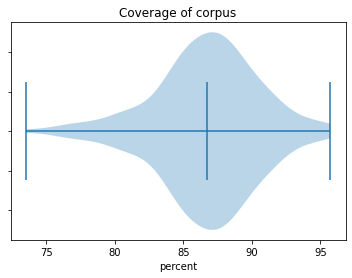

In [59]:
fig, ax = plt.subplots()

violin_parts = plt.violinplot(coverage_by_text, showmeans=True, vert=False) 

ax.set_title('Coverage of corpus')
ax.set_yticklabels([])
ax.set_xlabel("percent")

plt.show() 

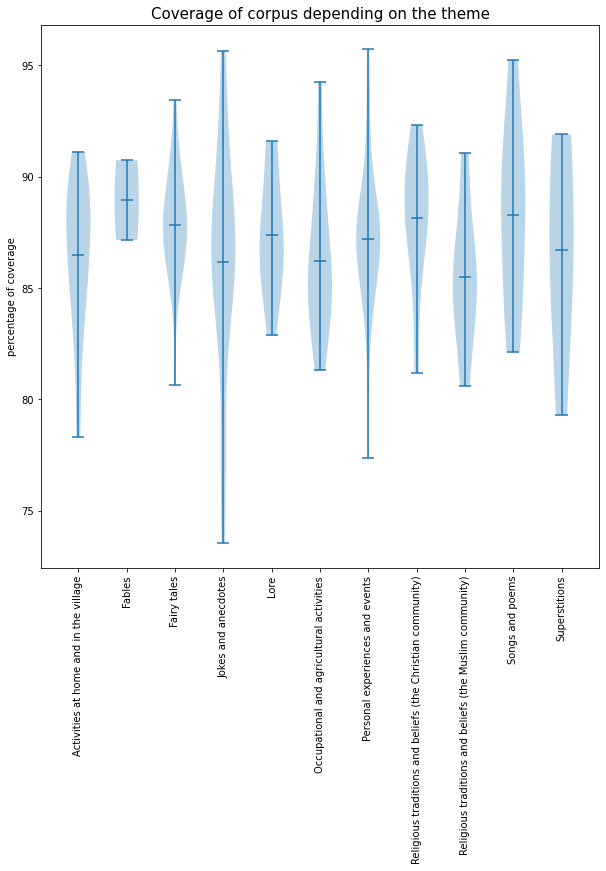

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))

violin_parts = plt.violinplot(cov_lists, showmeans=True) 

ax.set_title('Coverage of corpus depending on the theme', fontsize=15)
ax.set_xticks([y + 1 for y in range(len(cov_lists))], labels=themes, rotation=90)
ax.set_ylabel("percentage of coverage")

plt.show() 

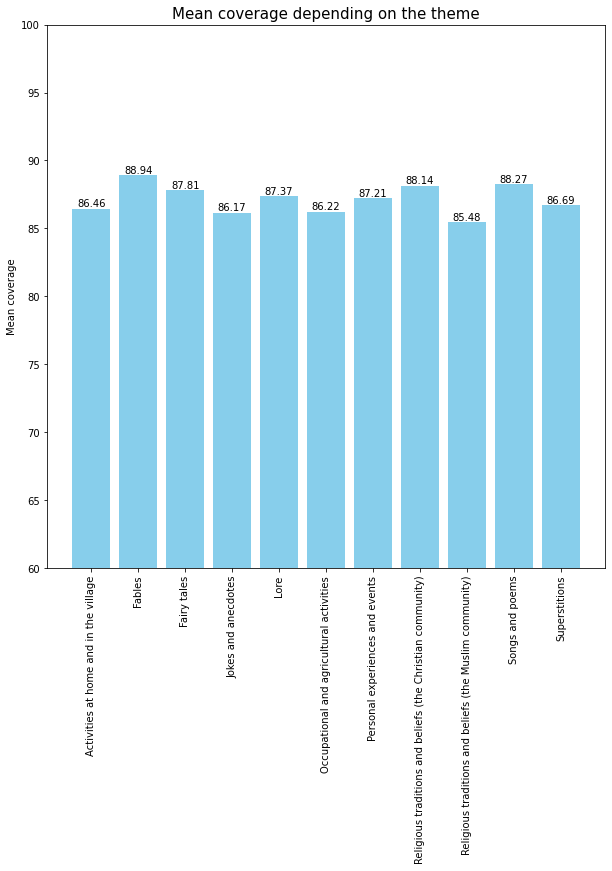

In [70]:
cov_list_rounded=[round(x,2) for x in cov_list]

fig, ax = plt.subplots(figsize=(10, 10))
bar_container = ax.bar(themes, cov_list_rounded, color="skyblue")

ax.set(ylabel='Mean coverage', ylim=(60, 100))
ax.set_title('Mean coverage depending on the theme', fontsize=15)

plt.xticks(rotation=90)
ax.bar_label(bar_container);